In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'depth'})
tmask = tmask.rename({'y' : 'gridY'})
tmask = tmask.rename({'x' : 'gridX'})
area = meshmask.e1t[0] * meshmask.e2t[0]
area = area.rename({'y': 'gridY'})
area = area.rename({'x': 'gridX'})
area
volumn = meshmask.e1t[0] * meshmask.e2t[0] * meshmask.e3t_0[0]
volumn = volumn.rename({'z' : 'depth'})
volumn = volumn.rename({'y' : 'gridY'})
volumn = volumn.rename({'x' : 'gridX'})
volumn

<xarray.DataArray (gridY: 898, gridX: 398, depth: 40)>
array([[[ 185243.37452372,  185244.08957647,  185245.48230844, ...,
         4988602.12148864, 4988890.54061969, 4989038.63339594],
        [ 190803.49776947,  190804.23428469,  190805.66881984, ...,
         5138336.18183385, 5138633.25793263, 5138785.79574822],
        [ 194672.17811027,  194672.92955888,  194674.39318027, ...,
         5242519.70259455, 5242822.80212832, 5242978.43275958],
        ...,
        [ 231245.03207738,  231245.92469983,  231247.66329022, ...,
         6227426.27406199, 6227786.3165811 , 6227971.18537267],
        [ 231250.84481954,  231251.73746443,  231253.47609851, ...,
         6227582.81114701, 6227942.8627164 , 6228127.73615497],
        [ 231256.65316662,  231257.54583394,  231259.28451169, ...,
         6227739.22987272, 6228099.29048557, 6228284.16856761]],

       [[ 185143.43441715,  185144.14908412,  185145.5410647 , ...,
         4985910.73547314, 4986198.99900004, 4986347.01187919],
        [ 190700.34398872,  190701.08010577,  190702.51386536, ...,
         5135558.25160667, 5135855.16709769, 5136007.62244701],
        [ 194576.87296009,  194577.62404081,  194579.08694566, ...,
         5239953.13590566, 5240256.08705178, 5240411.64149136],
...
        [ 177713.73998053,  177714.42596835,  177715.76208959, ...,
         4785829.142683  , 4786105.8383683 , 4786247.91157982],
        [ 177057.6964592 ,  177058.37991464,  177059.71110349, ...,
         4768161.89757515, 4768437.5718177 , 4768579.12055537],
        [ 176408.84861791,  176409.52956875,  176410.85587931, ...,
         4750688.43205494, 4750963.09605822, 4751104.12607462]],

       [[ 238327.01473203,  238327.93469145,  238329.72652694, ...,
         6418143.99223245, 6418515.06121492, 6418705.59169602],
        [ 238155.19081508,  238156.11011125,  238157.9006549 , ...,
         6413516.77596178, 6413887.57741887, 6414077.97053537],
        [ 237066.46303945,  237067.37813305,  237069.16049122, ...,
         6384197.3484508 , 6384566.45478697, 6384755.97752028],
        ...,
        [ 177165.58040949,  177166.26428137,  177167.59628134, ...,
         4771067.2112183 , 4771343.05343336, 4771484.68841883],
        [ 176356.6297533 ,  176357.31050258,  176358.63642053, ...,
         4749282.17858214, 4749556.761282  , 4749697.74955204],
        [ 175504.07273636,  175504.7501947 ,  175506.0697028 , ...,
         4726322.82711085, 4726596.08240155, 4726736.38909506]]])
Dimensions without coordinates: gridY, gridX, depth

In [3]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')

In [4]:
data = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_outfall_20180101_20191130.nc')
data = data.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04','2019-05','2019-06', '2019-07', '2019-08', '2019-09', '2019-10','2019-11']
data = data.assign_coords(time = time_values)

In [5]:
total_outfall = (data['outfall'] * area).where(tmask).sum(axis = 2).sum(axis = 2) / area.where(tmask).sum()
total_outfall

<xarray.DataArray (time: 23, depth: 40)>
array([[1.23135525e-07, 1.24392100e-07, 1.27503614e-07, 1.31658084e-07,
        1.32373304e-07, 1.36160417e-07, 1.39706544e-07, 1.43000789e-07,
        1.46164849e-07, 1.49047642e-07, 1.52358425e-07, 1.55167559e-07,
        1.57978639e-07, 1.61137066e-07, 1.64903978e-07, 1.69288414e-07,
        1.75011245e-07, 1.80364653e-07, 1.88154327e-07, 1.99709322e-07,
        2.17270702e-07, 2.49013586e-07, 2.92397992e-07, 3.05906586e-07,
        2.53641470e-07, 1.73824356e-07, 1.02971914e-07, 5.53864736e-08,
        2.46520658e-08, 9.20598584e-09, 3.32381058e-09, 1.05631744e-09,
        2.86388377e-10, 8.23286038e-11, 3.09289096e-11, 9.72688499e-12,
        1.00341279e-12, 2.65192985e-13, 4.89262320e-14, 0.00000000e+00],
       [3.61847679e-07, 3.65539421e-07, 3.67709860e-07, 3.67029000e-07,
        3.58072325e-07, 3.53040952e-07, 3.47939371e-07, 3.43528514e-07,
        3.39363007e-07, 3.36072944e-07, 3.34572908e-07, 3.34343746e-07,
        3.35984629e-07, 3.39217871e-07, 3.44875633e-07, 3.52644885e-07,
        3.62918981e-07, 3.74957187e-07, 3.91309638e-07, 4.14625727e-07,
        4.50030050e-07, 5.05494822e-07, 5.76698339e-07, 6.27722152e-07,
        6.06291695e-07, 5.30317068e-07, 4.15543367e-07, 2.81795140e-07,
        1.45988459e-07, 5.96126535e-08, 2.25995782e-08, 7.99298941e-09,
        2.74913686e-09, 9.38351955e-10, 3.97912495e-10, 1.52657776e-10,
        3.68109674e-11, 1.18210620e-11, 2.33390918e-12, 0.00000000e+00],
...
       [2.49547430e-06, 2.52167563e-06, 2.55120797e-06, 2.57529903e-06,
        2.56377363e-06, 2.56983030e-06, 2.56886535e-06, 2.56859611e-06,
        2.56316633e-06, 2.55792942e-06, 2.55399556e-06, 2.54984871e-06,
        2.54471270e-06, 2.53908598e-06, 2.53559077e-06, 2.53274574e-06,
        2.53095082e-06, 2.52981262e-06, 2.52936459e-06, 2.53027081e-06,
        2.53046431e-06, 2.53796592e-06, 2.56104540e-06, 2.55885920e-06,
        2.44778162e-06, 2.17771310e-06, 1.78242825e-06, 1.37290764e-06,
        1.03885099e-06, 8.05201885e-07, 6.35527395e-07, 5.11402524e-07,
        4.17882735e-07, 3.41544523e-07, 2.81235865e-07, 2.19852194e-07,
        1.57512302e-07, 1.15022229e-07, 7.90705635e-08, 0.00000000e+00],
       [2.61235992e-06, 2.64643881e-06, 2.68280630e-06, 2.71454413e-06,
        2.70826035e-06, 2.71981903e-06, 2.72269679e-06, 2.72512495e-06,
        2.72123934e-06, 2.71714221e-06, 2.71484130e-06, 2.71235444e-06,
        2.70913755e-06, 2.70539707e-06, 2.70368963e-06, 2.70233214e-06,
        2.70192320e-06, 2.70131987e-06, 2.70115675e-06, 2.70082926e-06,
        2.69694910e-06, 2.69514416e-06, 2.69870348e-06, 2.67790831e-06,
        2.53648230e-06, 2.21413103e-06, 1.78877266e-06, 1.37734866e-06,
        1.04639228e-06, 8.16931116e-07, 6.47673852e-07, 5.20955195e-07,
        4.25260034e-07, 3.47944860e-07, 2.87876668e-07, 2.26805418e-07,
        1.64999412e-07, 1.21979629e-07, 8.49996830e-08, 0.00000000e+00]])
Coordinates:
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2019-10' '2019-11'

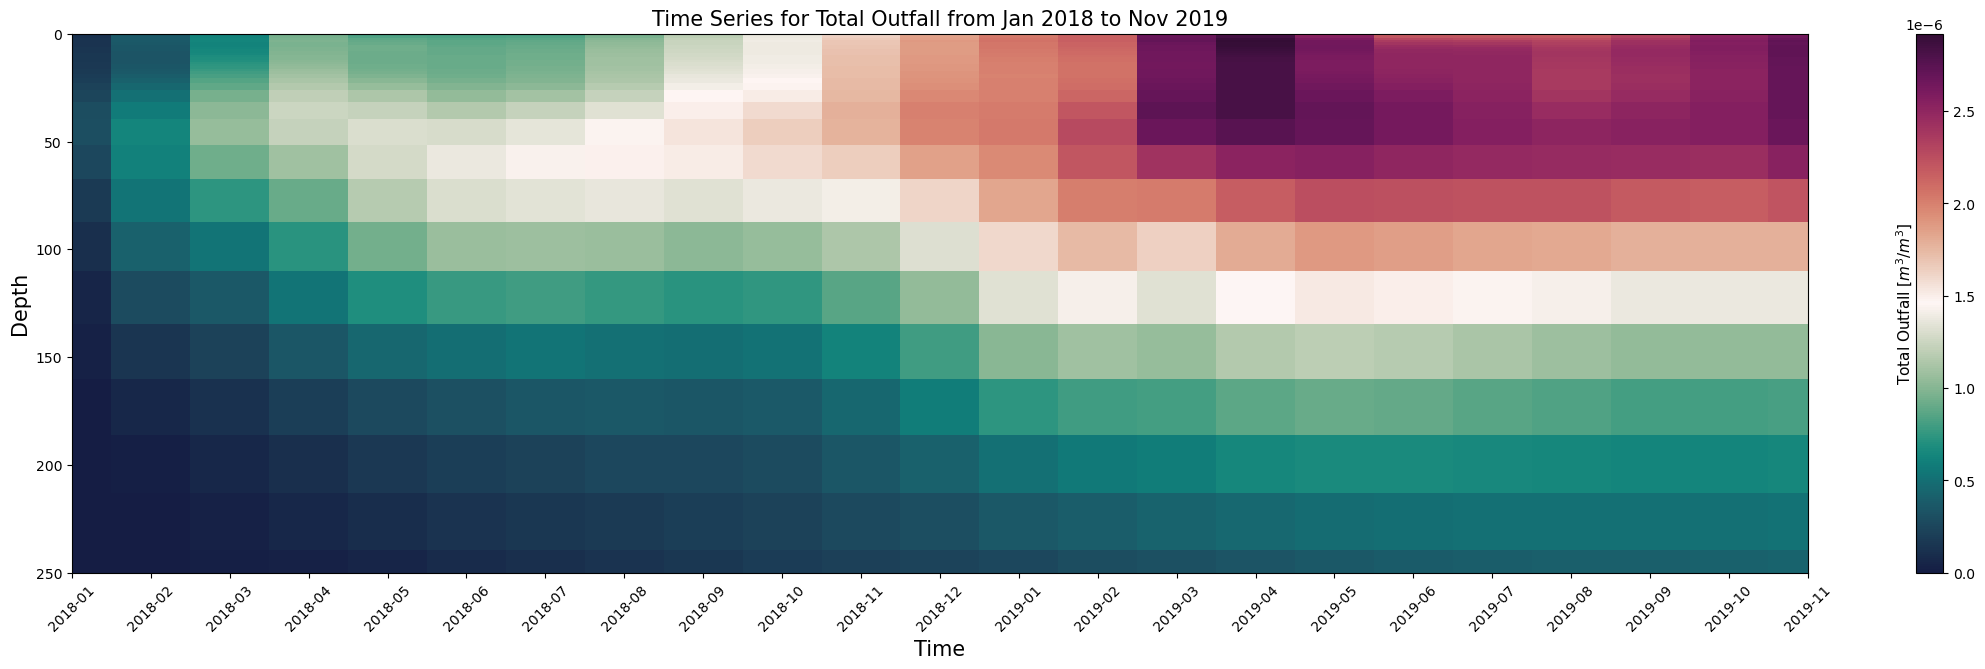

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(28, 7))
total_outfall.plot(ax = axs, y = "depth", yincrease = False, cmap = cm_vel)
axs.set_ylim(250, 0)
axs.set_title(f'Time Series for Total Outfall from Jan 2018 to Nov 2019', fontsize = 15)
axs.set_xlabel('Time', fontsize = 15)
axs.set_ylabel('Depth', fontsize = 15)
plt.setp(axs.get_xticklabels(), rotation=45)

label_text = 'Total Outfall [$m^3/m^3$]'  # Replace with the desired label text
label_x = 1.05  # Adjust the position of the label on the x-axis as needed
label_y = 0.5  # Adjust the position of the label on the y-axis as needed
axs.text(label_x, label_y, label_text, transform=axs.transAxes, rotation=90, va='center', fontsize = 11)
fig.savefig('outfallTimeSeries.png', dpi=300)


In [8]:
outfall_sum = (data['outfall'] * volumn).where(tmask).sum(axis = 1).sum(axis = 1).sum(axis = 1)
outfall_sum

<xarray.DataArray (time: 23)>
array([1.07265958e+07, 3.02395233e+07, 4.80595457e+07, 6.43469250e+07,
       7.48157414e+07, 8.10845847e+07, 8.55439057e+07, 9.02904662e+07,
       9.52610515e+07, 1.02302057e+08, 1.14579764e+08, 1.31533909e+08,
       1.48469467e+08, 1.61228350e+08, 1.73838464e+08, 1.85973445e+08,
       1.87052818e+08, 1.84641078e+08, 1.82717206e+08, 1.80263900e+08,
       1.80071258e+08, 1.82551346e+08, 1.88086100e+08])
Coordinates:
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2019-10' '2019-11'

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

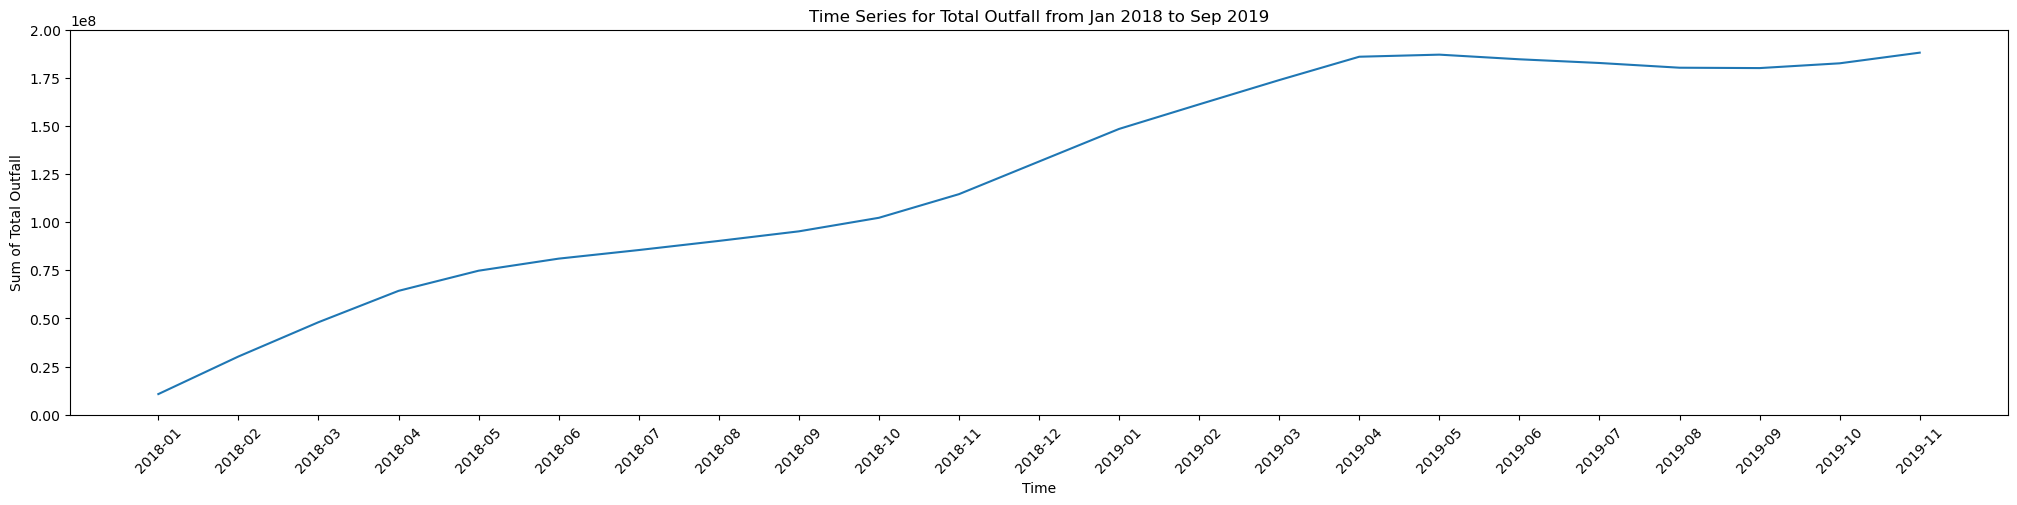

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(25, 5))
outfall_sum.plot(ax=axs)
axs.set_title(f'Time Series for Total Outfall from Jan 2018 to Sep 2019')
axs.set_xlabel('Time')
axs.set_ylabel('Sum of Total Outfall')
axs.set_ylim([0, 2e8])
plt.setp(axs.get_xticklabels(), rotation=45)